In [1]:
# Import relevant python libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
# Q1 - Import data
df = pd.read_excel('toy_sales_data.xlsx')
print('Importing data:')
df

Importing data:


,month,sales,tv_spend,digital_spend,trend,xmas
0,2016-01-01,3700000,600000.0,300000.00,1,0
1,2016-02-01,8900000,2880000.0,90000.00,2,0
2,2016-03-01,8200000,864000.0,427000.00,3,0
3,2016-04-01,5800000,259200.0,128100.00,4,0
4,2016-05-01,11000000,2077760.0,538430.00,5,0
5,2016-06-01,7700000,623328.0,161529.00,6,0
6,2016-07-01,10300000,2186998.4,48458.70,7,0
7,2016-08-01,7800000,656099.5,14537.61,8,0
8,2016-09-01,9500000,196829.9,804361.28,9,0
9,2016-10-01,10600000,1859049.0,241308.38,10,0


In [3]:
# Q1 - Import data (2nd Sheet)
df_planned_spend = pd.read_excel('toy_sales_data.xlsx', sheet_name='planned_spend')
df_planned_spend

,month,tv_spend,digital_spend
0,2018-01-01,350000,215000
1,2018-02-01,950000,150000
2,2018-03-01,1350000,400000


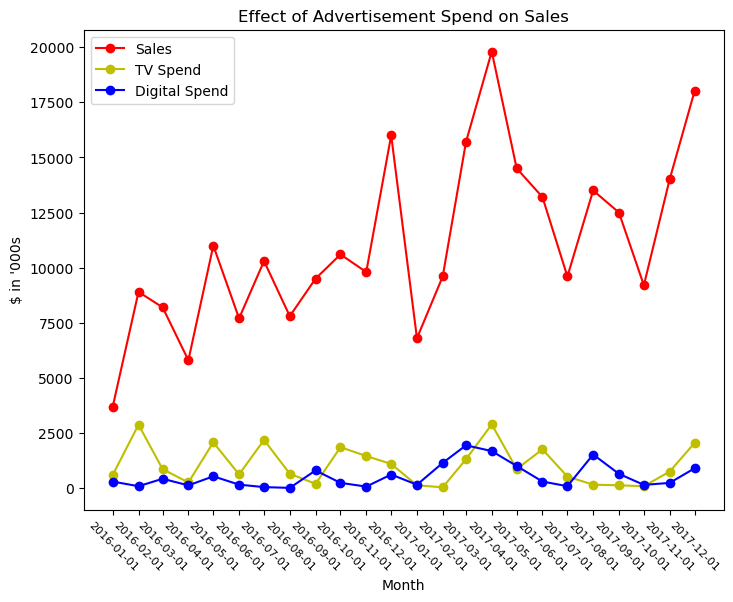

In [4]:
# Q2 - Charting of Spend, Sales, Time
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = df['month']
y1 = df['sales'] / 1000
y2 = df['tv_spend'] / 1000
y3 = df['digital_spend'] / 1000
l1 = ax.plot(x, y1, 'ro-')
l2 = ax.plot(x, y2, 'yo-')
l3 = ax.plot(x, y3, 'bo-')
ax.legend(labels = ('Sales','TV Spend','Digital Spend'), loc = 'upper left')
ax.set_title('Effect of Advertisement Spend on Sales')
ax.set_xlabel('Month')
plt.xticks(df['month'], fontsize = 8)
ax.tick_params(axis='x', labelrotation = -45)
ax.set_ylabel("$ in '000s")
plt.show()

In [5]:
# Preparing for Questions 3-6

# Import Libraries for Linear Regression:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Assign values of X, y for Linear Regression:
X, y = df[['tv_spend', 'digital_spend']], df['sales']#[["sales", "wt", "drat", "qsec"]], df

# Creating Summary Table of an Ordinary Least Squares regression to show Adj. R-Squared, p-values
# Adding a constant to the model (for intercept)
X_sm = sm.add_constant(X)
# Fitting the model
model_sm = sm.OLS(y, X_sm).fit()
# Getting the summary which includes p-values and coefficients
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     15.55
Date:                Tue, 05 Dec 2023   Prob (F-statistic):           7.17e-05
Time:                        21:21:35   Log-Likelihood:                -386.91
No. Observations:                  24   AIC:                             779.8
Df Residuals:                      21   BIC:                             783.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.767e+06   9.69e+05      6.987

In [6]:
# Q3 - Showing Adj. R-squared (Top right section):
print('Referencing the summary table above:')
print('We have an Adj. R-Squared of ' + str(model_sm.rsquared_adj) + '. That means the independent variables in the model accounts for 55.9% of the differences in the dependent variable (Sales)')

Referencing the summary table above:
We have an Adj. R-Squared of 0.5586160564825517. That means the independent variables in the model accounts for 55.9% of the differences in the dependent variable (Sales)


In [7]:
# Q4 - p-value / Statistical Significance (P>|t|):
print('Referencing the summary table above:')
print('We have P-values of 0.010 and 0.000 for TV Spend and Digital Spend respectively.')
print('These are both low values and means both these independent variables are highly statistically significant.')
print('In an experiment format, if p-value is below specified threshold (eg. 0.05),the null hypothesis would be rejected.')

Referencing the summary table above:
We have P-values of 0.010 and 0.000 for TV Spend and Digital Spend respectively.
These are both low values and means both these independent variables are highly statistically significant.
In an experiment format, if p-value is below specified threshold (eg. 0.05),the null hypothesis would be rejected.


In [8]:
# Q5 - Calculate the contribution from TV Spend to Sales in % and absolute dollar value
# Q6 - Calculate the TV return on investment (ROI)

# Extracting coefficient
coeff_tv = model_sm.params['tv_spend']  # Coefficient of x1
print('With a coefficient of {:.2f}, this means that every $1 of TV spend, it should return ${:.2f} of revenue or a {:.0f}% return.'.format(coeff_tv,coeff_tv, coeff_tv*100))
print('If we do some calculations to deduct the cost of the spend from that percentage, we can attain a TV Spend ROI of {:.0f}%'.format((coeff_tv-1)*100))

With a coefficient of 1.73, this means that every $1 of TV spend, it should return $1.73 of revenue or a 173% return.
If we do some calculations to deduct the cost of the spend from that percentage, we can attain a TV Spend ROI of 73%


In [9]:
# Q7 - Using the planned spend values for the first 3 months of 2018 and your regressions model, calculate the expected sales value for the first 3 months of 2018
model = LinearRegression()
model.fit(X, y)

# Applying model to planned spend data to generate predictions
X_planned = df_planned_spend[['tv_spend','digital_spend']]
y_pred = model.predict(X_planned)

# Loop to display prediction values
month_range = np.arange(1,4,1)
for i in range(3):
    print("Month " + str(month_range[i]) + ' Expected Sales Value: {:.0f}'.format(y_pred[i]))

Month 1 Expected Sales Value: 8334056
Month 2 Expected Sales Value: 9082486
Month 3 Expected Sales Value: 10892394


In [10]:
# Q8 - In your opinion what additional data would improve your model and why?
print('More breakdowns of the spend data by channels, and longer timespan of datapoints (ie. more rows) would help improve the model.')
print('Respectively, this would allow us to go into greater analytical detail, as well as allow us to develop more reliable models.')
print('With a larger dataset, this may reduce the probability of overfitting or over-extrapolation.')

More breakdowns of the spend data by channels, and longer timespan of datapoints (ie. more rows) would help improve the model.
Respectively, this would allow us to go into greater analytical detail, as well as allow us to develop more reliable models.
With a larger dataset, this may reduce the probability of overfitting or over-extrapolation.
